## Preamble



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from getdist import plots, MCSamples
from IPython.display import HTML, display
# import tabulate
import glob

## MCMC analysis



In [1]:
import pandas as pd
def get_chains(path):
    all_files = glob.glob(path)
    # Sort alphabetically
    all_files.sort()
    chains = {}
    for f in all_files:
        df = pd.read_csv(f, delim_whitespace=True)
        # Compute delta chi2
        delta_chi2 = df.chi2-np.min(df.chi2)

        # Remove useless columns
        df.drop(columns=["#weight", "minuslogpost", "minuslogprior", "minuslogprior__0", "chi2", "chi2__chi2"], inplace=True)
        # Insert Delta chi2 before As (which is derived and never plot)
        df.insert(value=delta_chi2, column="delta_chi2", loc=len(df.columns))
        key = f.split("/")[-2]
        chains[key] = df
    return chains

def plot_chains(path, burnin=0, labels=[], nrow=2, ncol=4):
    chains = get_chains(path=path)
    plt.figure(figsize=(18, 10))
    for i in range(0, len(labels)):
        plt.subplot(nrow, ncol, i+1)
        plt.ylabel(labels[i])
        for k, v in chains.items():
            j = k.split("_")[-1]
            n = np.arange(len(v))
            ist = 0
            if 0 < burnin < 1:
                ist = int((1.-burnin)*len(v))
            else:
                ist = int(burnin)
            plt.plot(n[ist:], v.iloc[:,i][ist:], alpha=0.75, color="C{}".format(j))
        if i == len(labels)-1:
            plt.legend(list(chains.keys()), loc="upper left", bbox_to_anchor=(1,1))
    plt.subplots_adjust(hspace=0.25, wspace=0.3)

### MCMC without \tau prior



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff"

#### R(TE)



# Out[112]:

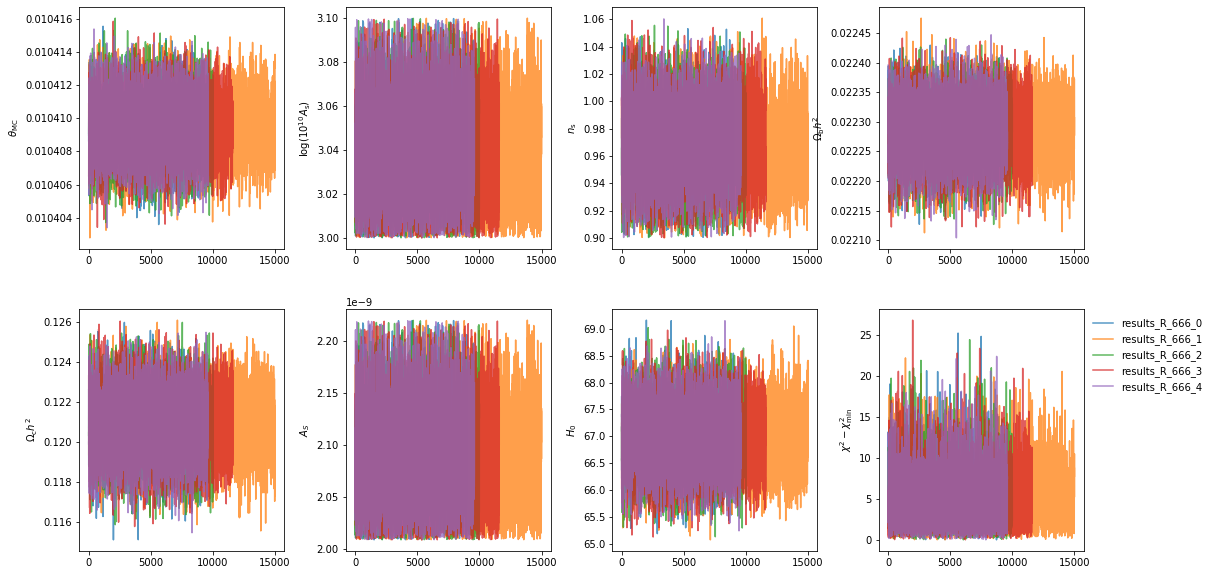

In [1]:
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels)

#### TE



# Out[113]:

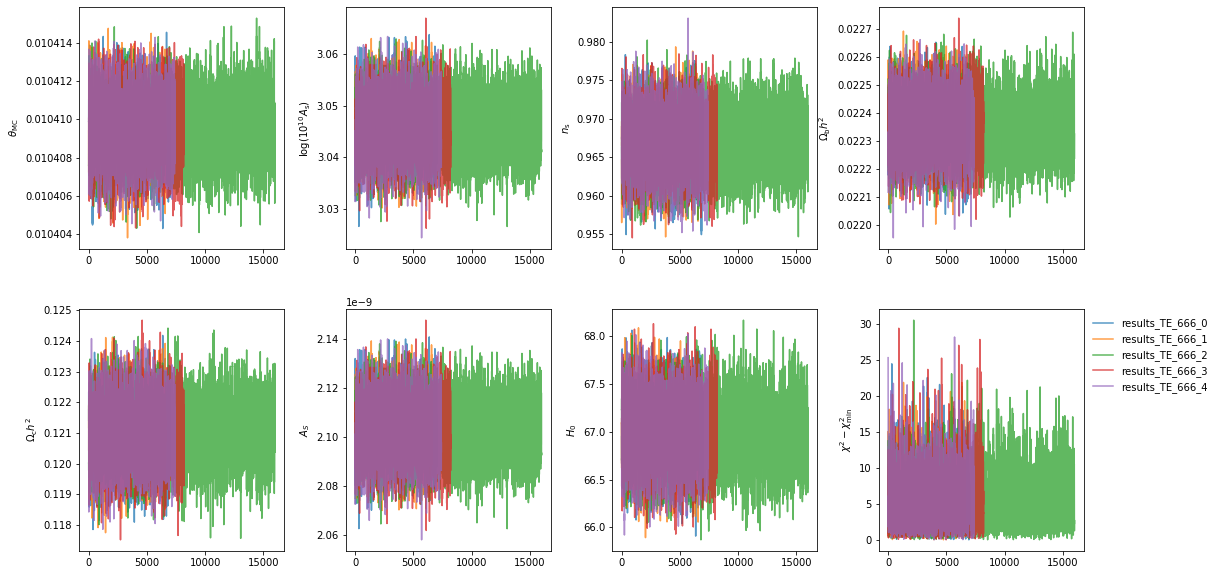

In [1]:
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels)

### MCMC with \tau prior



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$\tau$",
  r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_tau"

#### R(TE)



# Out[13]:

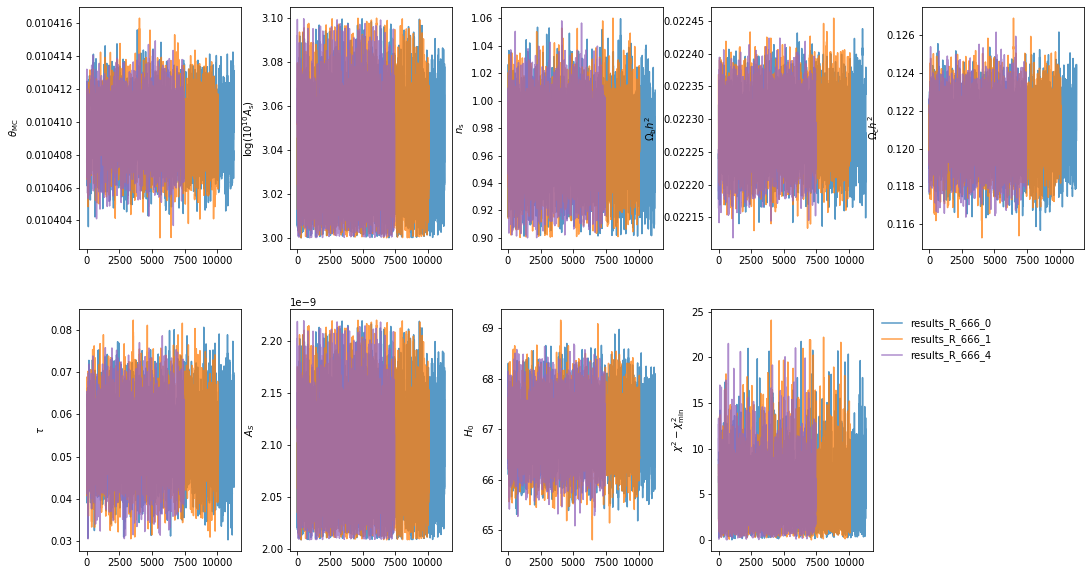

In [1]:
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

#### TE



# Out[12]:

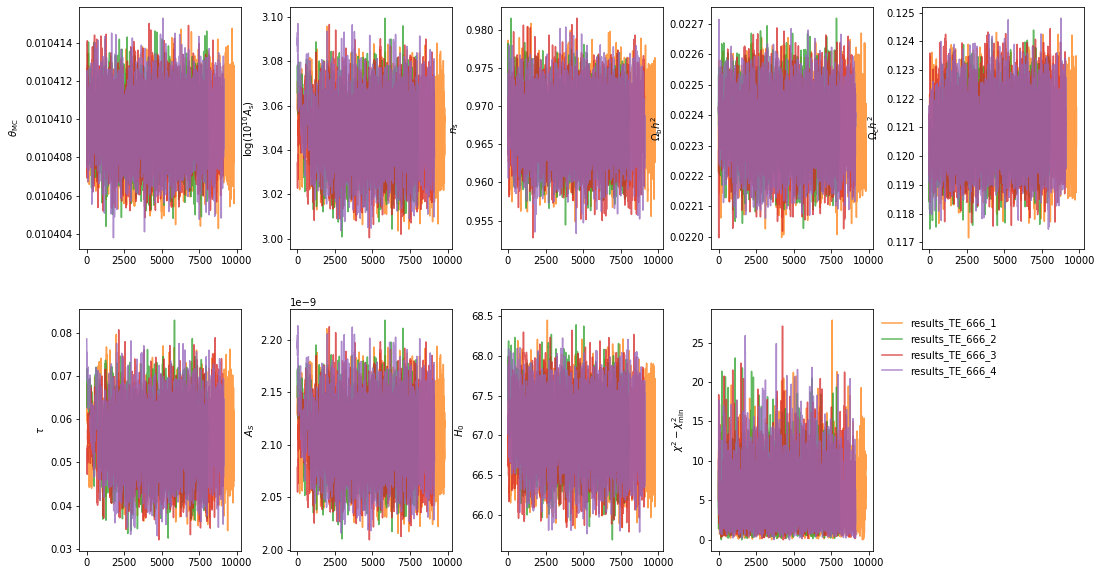

In [1]:
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

### MCMC with systematics



In [1]:
labels = [
  r"$\theta_\mathrm{MC}$",
  r"$\log(10^{10}A_\mathrm{s})$",
  r"$n_\mathrm{s}$",
  r"$\Omega_\mathrm{b}h^2$",
  r"$\Omega_\mathrm{c}h^2$",
  r"$\tau$",
  r"$A_S$",
  r"$H_0$",
  r"$\chi^2-\chi^2_\mathrm{min}$"]

#### 1% beam + 1% efficiency



# Out[70]:

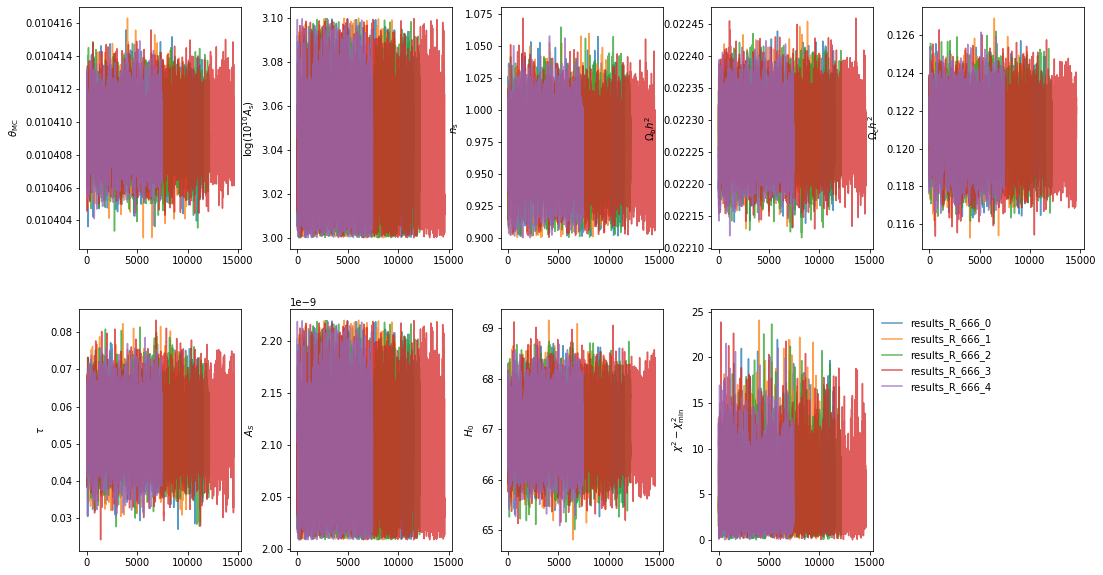

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_1percent_pol_effiency_1percent"
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

# Out[71]:

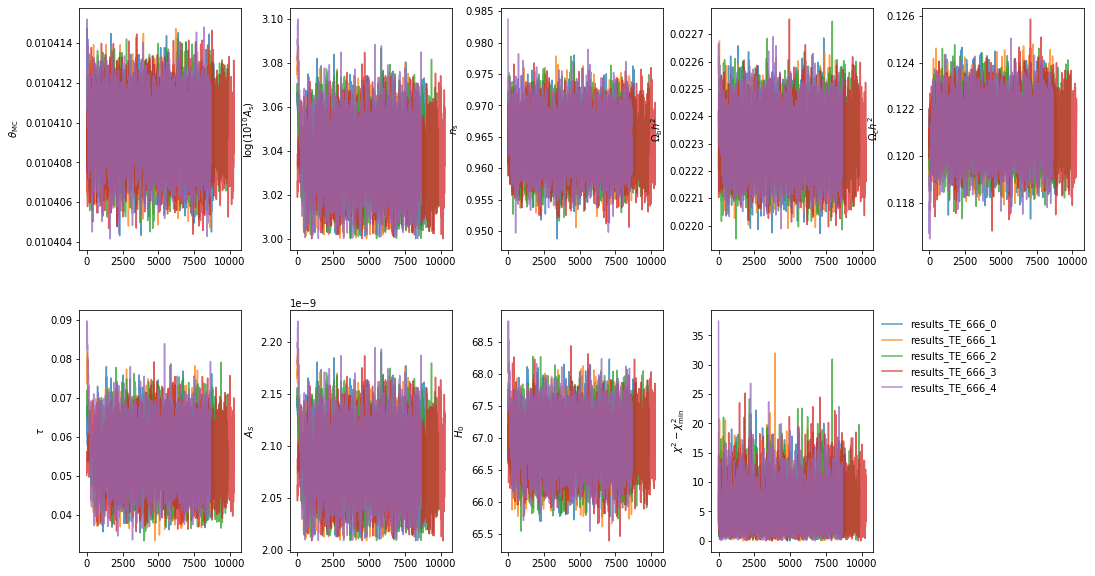

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_1percent_pol_effiency_1percent"
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

#### 2% beam + 2% efficiency



# Out[72]:

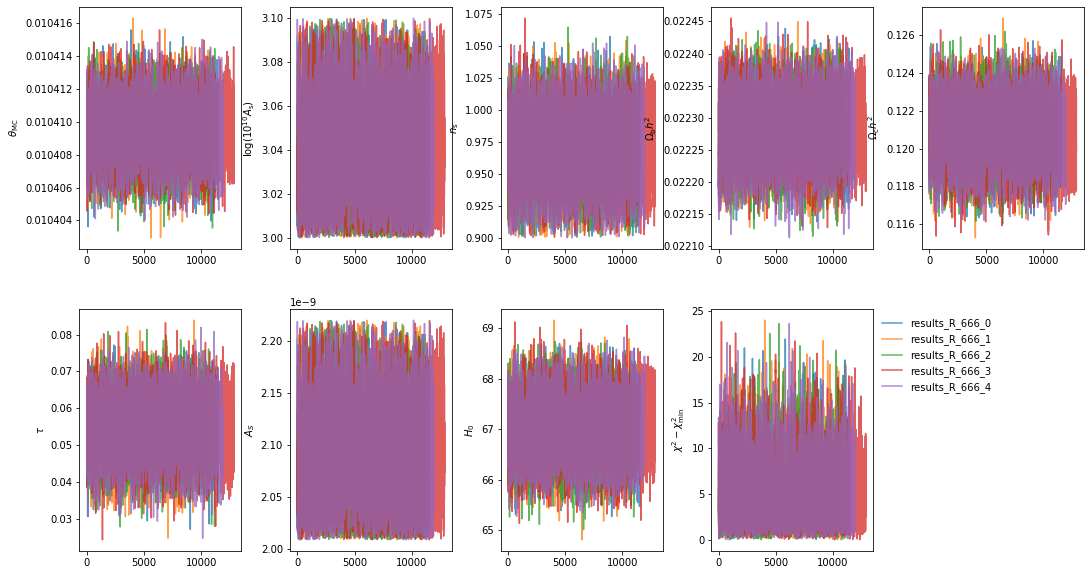

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_2percent_pol_effiency_2percent"
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

# Out[73]:

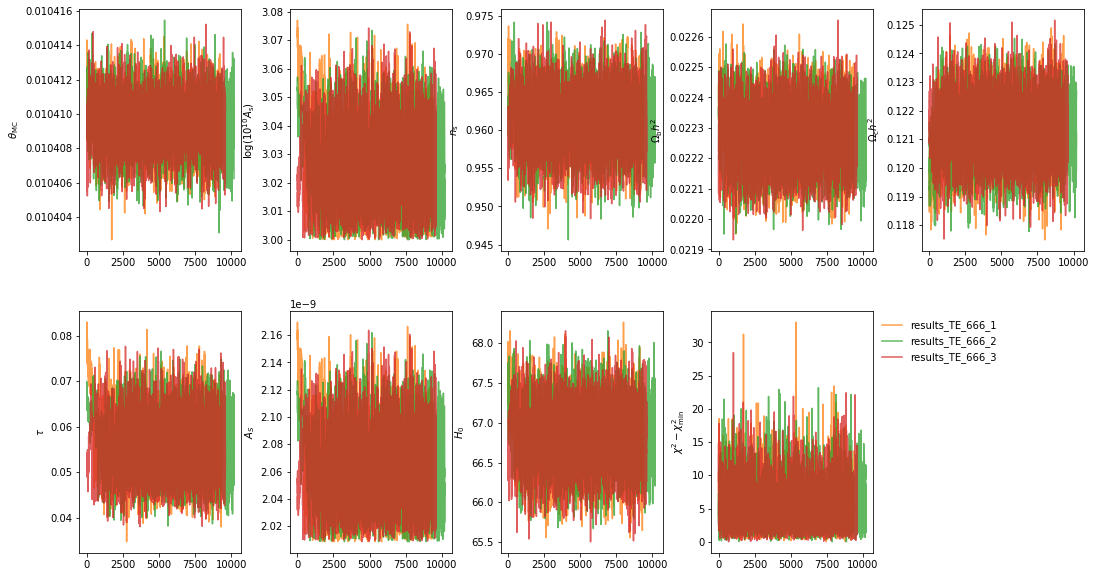

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_2percent_pol_effiency_2percent"
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

#### 5% beam + 3% efficiency



# Out[74]:

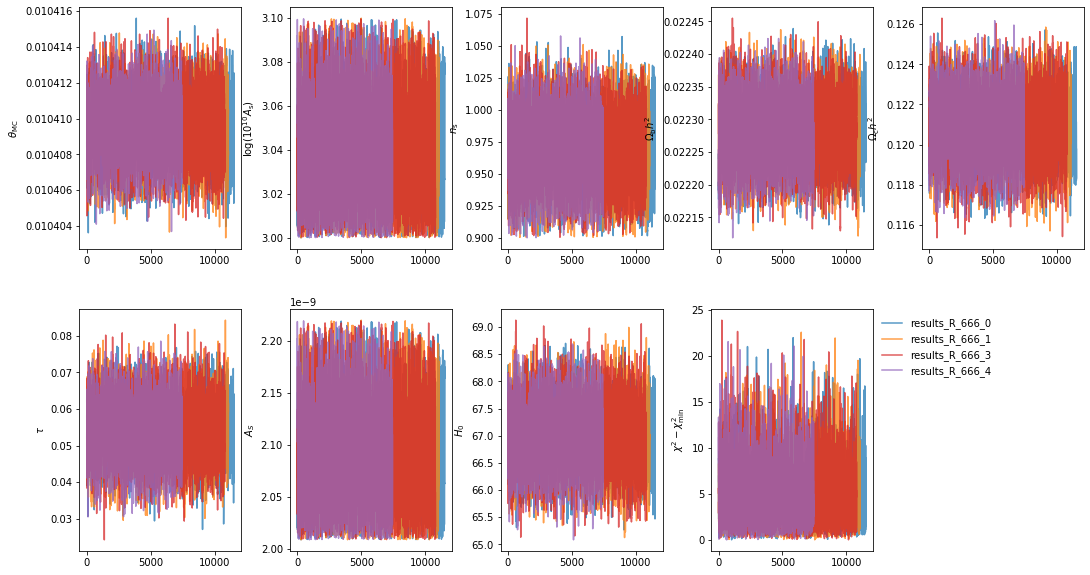

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_5percent_pol_effiency_3percent"
plot_chains(result_path + "/*_R_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

# Out[75]:

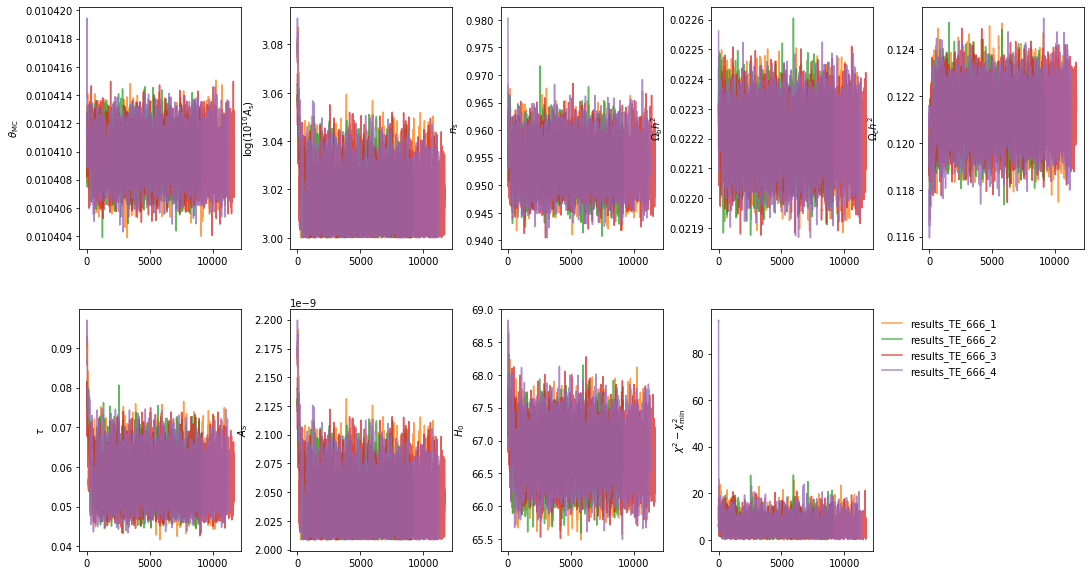

In [1]:
result_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_beam_5percent_pol_effiency_3percent"
plot_chains(result_path + "/*_TE_*/mcmc*.txt", burnin=0, labels=labels, ncol=5)

## MCMC distributions



In [1]:
def get_mcmc_samples(path, chains, cols, labels, burnin=0.4, diff=False):
    from getdist import loadMCSamples, plots, MCSamples

    def get_samples(path, cols):
        # Load MC Samples
        tmp = loadMCSamples(path, no_cache=True, settings={"ignore_rows": burnin})

        # Keep only interesting columns i.e. cosmo; parameters
        samples = [tmp.samples[:, i] for i in cols]
        if diff:
            # Get mean diffs as arrays
            mean_diffs = tmp.mean_diffs()
            # Keep only interesting columns i.e. cosmo; parameters
            samples = [mean_diffs[i] for i in cols]

        return MCSamples(samples=samples, names=labels)


    samples = []
    for k, v in chains.items():
        mcmc_path = path.format(k, v) + "/mcmc"
        samples += [get_samples(mcmc_path, cols)]
    return samples

### MCMC without \tau prior



# Out[93]:

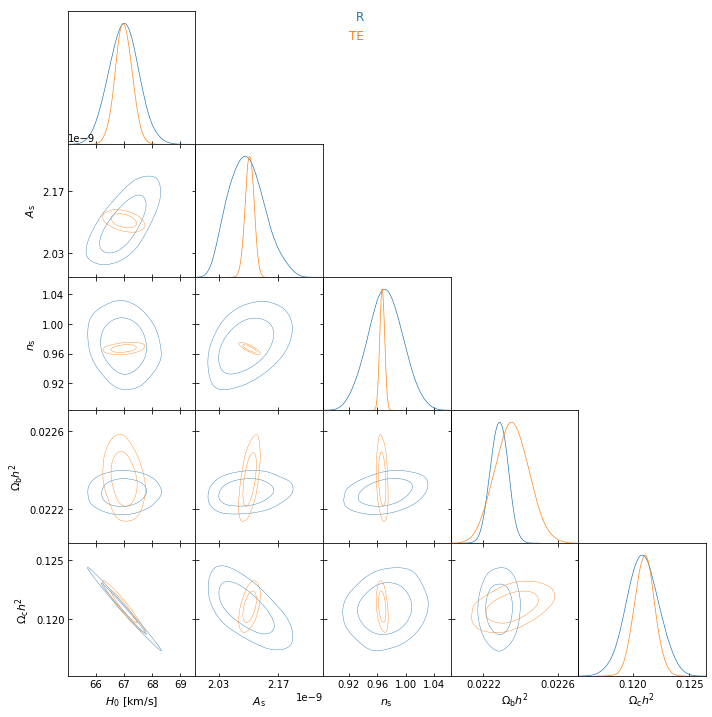

In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$"]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]
tmpl_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff/results_{}_666_{}"

mcmc_study= {"R"  : 4,
             "TE" : 2
}
cols = [6, 5, 2, 3, 4]
samples = get_mcmc_samples(tmpl_path, mcmc_study, cols, labels)

g = plots.getSubplotPlotter()
g.settings.lineM = ["-C{}".format(i) for i in range(10)]
g.triangle_plot(samples, legend_labels=[])
g.add_legend(list(mcmc_study.keys()), colored_text=True, figure=True, align_right=True)

### MCMC with \tau prior



# Out[94]:

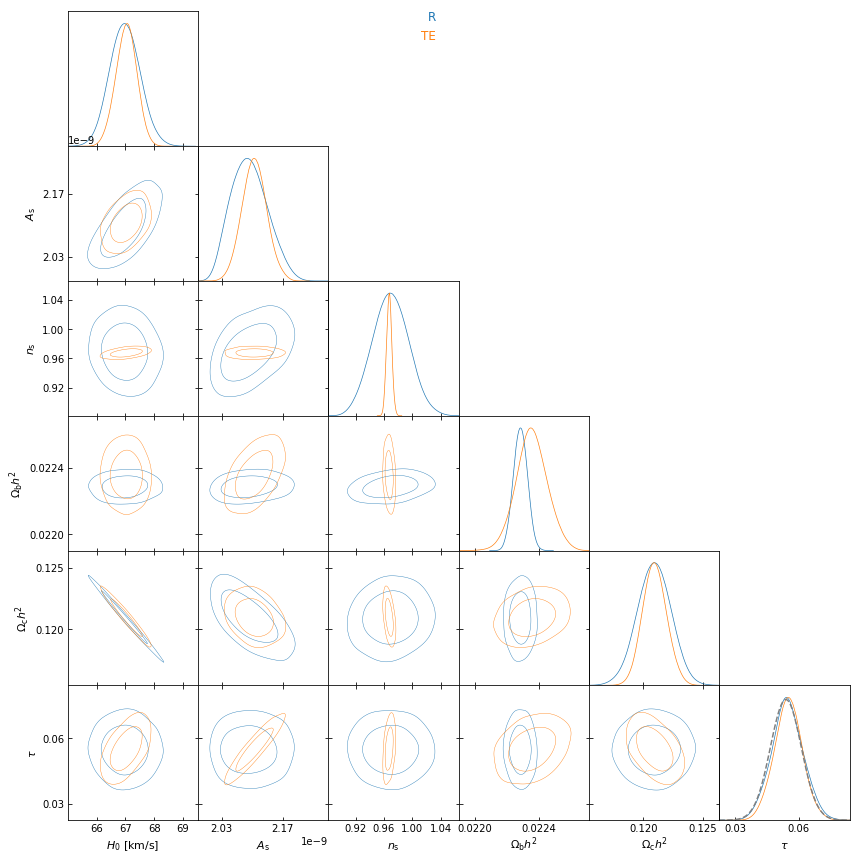

In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$"]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]
tmpl_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_tau/results_{}_666_{}"

mcmc_study= {"R"  : 0,
             "TE" : 1
}
cols = [7, 6, 2, 3, 4, 5]
samples = get_mcmc_samples(tmpl_path, mcmc_study, cols, labels)

g = plots.getSubplotPlotter()
g.settings.lineM = ["-C{}".format(i) for i in range(10)]
g.triangle_plot(samples, legend_labels=[])
g.add_legend(list(mcmc_study.keys()), colored_text=True, figure=True, align_right=True)

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--')
#  g.export("triangle_plot.pdf")

### MCMC with systematics



# Out[116]:

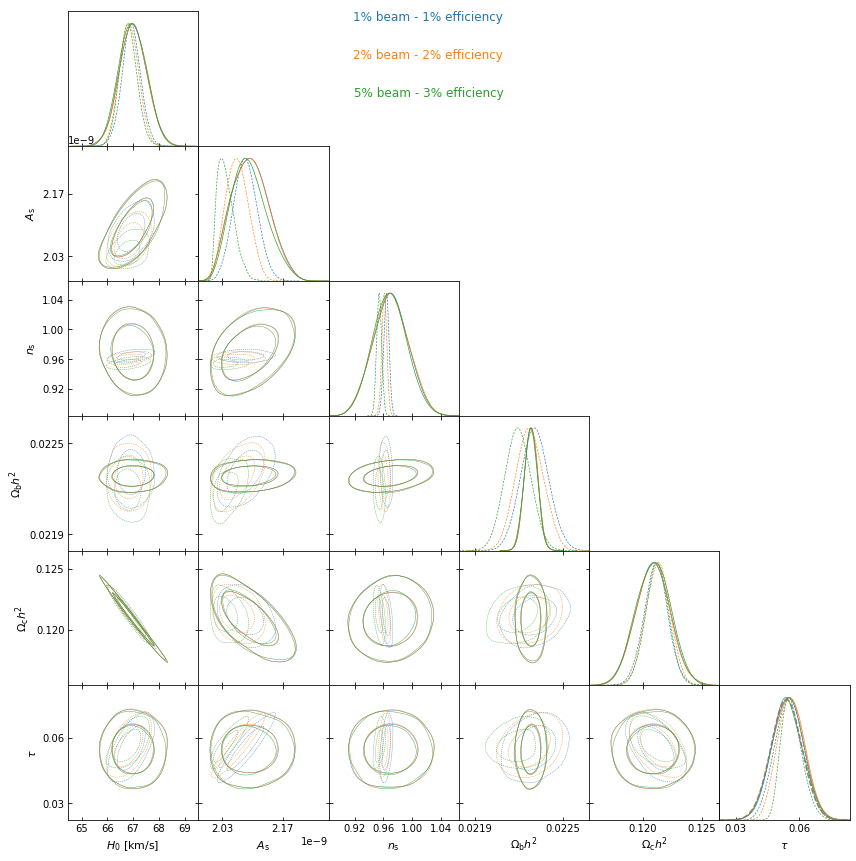

In [1]:
labels = [r"$H_0~[\mathrm{km/s}]$",
          r"$A_\mathrm{s}$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$\tau$"]
# r"$\Delta\mathrm{A}_\mathrm{L}$"]

systematics = {"beam_1percent_pol_effiency_1percent": {"R": 3, "TE": 3},
               "beam_2percent_pol_effiency_2percent": {"R": 3, "TE": 2},
               "beam_5percent_pol_effiency_3percent": {"R": 0, "TE": 3}}

cols = [7, 6, 2, 3, 4, 5]
samples = []
for k1, v1 in systematics.items():
    tmpl_path = r"/home/garrido/Workdir/CMB/analysis/corrcoeff/output/mcmc_corrcoeff_syst_{}"
    path = tmpl_path.format(k1) + "/results_{}_666_{}"
    samples += get_mcmc_samples(path, v1, cols, labels)

g = plots.getSubplotPlotter()
g.settings.lineM = ["-C0", "--C0", "-C1", "--C1", "-C2", "--C2"]
g.triangle_plot(samples, legend_labels=[])
g.add_legend(["1% beam - 1% efficiency", "", "2% beam - 2% efficiency", "", "5% beam - 3% efficiency"],
             colored_text=True, figure=True, align_right=True)

# Show prior on tau
ax = g.subplots[-1, -1]
xmin, xmax, ymin, ymax = ax.axis()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
ax.plot(x, 0.018*norm.pdf(x, 0.054, 0.0073), color='gray', ls='--')